In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc

In [2]:
df = pd.read_csv('DX.csv')
df.shape

(27131, 18)

In [3]:
def clean(i):
    i = i.copy()
    i.drop_duplicates(subset=['Organization Name','Funding Type'], inplace = True)
    i.drop_duplicates(keep='first', inplace= True)
    i['Raised Series A'] = np.where(i['Organization Name'].duplicated(), 1, 0)
    i.drop_duplicates(subset='Organization Name', keep='last', inplace= True)
    i['Money Raised Currency (in USD)'] = pd.to_numeric(i['Money Raised Currency (in USD)'], errors='coerce')
    i['Total Funding Amount Currency (in USD)'] = pd.to_numeric(i['Total Funding Amount Currency (in USD)'], errors='coerce')
    i['Announced Date'] = pd.to_datetime(i['Announced Date'], errors='coerce')
    i['Total Funding Amount Currency (in USD)'] = pd.to_numeric(i['Total Funding Amount Currency (in USD)'], errors='coerce')
    i  = i[i['Funding Type'] != 'Series A'] 
    
    # new data frame with split value columns 
    new = i["Organization Industries"].str.split(",", n = 7, expand = True) 
    # making separate first name column from new data frame 
    i["Primary Industry"]= new[0] 
    # making separate last name column from new data frame 
    i["Sub_Ind"]= new[1] 
    i["Sub_Ind2"]= new[2]
    i["Sub_Ind3"]= new[3]
    i["Sub_Ind4"]= new[4]
    i["Sub_Ind5"]= new[5]
    i["Sub_Ind6"]= new[6]
    i["Sub_Ind7"]= new[7]
    # Dropping old Name columns 
    i.drop(columns =["Organization Industries"], inplace = True)

    #same thing but for investor column 
    new1 = i["Investor Names"].str.split(",", n = 11, expand = True) 
    # making separate first name column from new data frame 
    i["Investor1"]= new1[0] 
    # making separate last name column from new data frame 
    i["Investor1"]= new1[1] 
    i["Investor2"]= new1[2]
    i["Investor3"]= new1[3]
    i["Investor4"]= new1[4]
    i["Investor5"]= new1[5]
    i["Investor6"]= new1[6]
    i["Investor7"]= new1[7]
    i["Investor8"]= new1[8]
    i["Investor9"]= new1[9]
    i["Investor10"]= new1[10]
    i["Investor11"]= new1[11]
    # Dropping old Name columns 
    i.drop(columns =["Investor Names"], inplace = True)
    i.drop(columns =["Lead Investors"], inplace = True)
    i.drop(columns =["Number of Investors"], inplace = True)
    i.drop(columns =["Transaction Name"], inplace = True)
    i.drop(columns =["Transaction Name URL"], inplace = True)
    i.drop(columns =["Organization Name URL"], inplace = True)
    i.drop(columns =["Funding Type"], inplace = True)
    i.drop(columns =["Money Raised Currency"], inplace = True)
    i.drop(columns =["Total Funding Amount Currency"], inplace = True)
    i.drop(columns =["Total Funding Amount"], inplace = True)
    i.drop(columns =["Money Raised"], inplace = True)
    i.drop(columns =["Total Funding Amount Currency (in USD)"], inplace = True)
    i.drop(columns =['Announced Date'], inplace = True) 
    i = i[i['Money Raised Currency (in USD)'].notna()]
    i = i[i['Organization Location'].notna()]
    i = i[i['Primary Industry'].notna()]
    i = i[i['Money Raised Currency (in USD)'].notna()]

    i['Primary Industry'].fillna('Not Listed', inplace = True)
    i['Sub_Ind'].fillna('Not Listed', inplace = True)
    i['Sub_Ind2'].fillna('Not Listed', inplace = True)
    i['Sub_Ind3'].fillna('Not Listed', inplace = True)
    i['Sub_Ind4'].fillna('Not Listed', inplace = True)
    i['Sub_Ind5'].fillna('Not Listed', inplace = True)
    i['Sub_Ind6'].fillna('Not Listed', inplace = True)
    i['Sub_Ind7'].fillna('Not Listed', inplace = True)
    i['Investor1'].fillna('Not Listed', inplace = True)
    i['Investor2'].fillna('Not Listed', inplace = True)
    i['Investor3'].fillna('Not Listed', inplace = True)
    i['Investor4'].fillna('Not Listed', inplace = True)
    i['Investor5'].fillna('Not Listed', inplace = True)
    i['Investor6'].fillna('Not Listed', inplace = True)
    i['Investor7'].fillna('Not Listed', inplace = True)
    i['Investor8'].fillna('Not Listed', inplace = True)
    i['Investor9'].fillna('Not Listed', inplace = True)
    i['Investor10'].fillna('Not Listed', inplace = True)
    i['Investor11'].fillna('Not Listed', inplace = True) 


    i["Organization Name"] = i["Organization Name"].astype('category')
    i["Organization Description"] = i["Organization Description"].astype('category')
    i["Organization Description"] = i["Organization Description"].astype('category')
    i["Organization Location"] = i["Organization Location"].astype('category')
    i["Primary Industry"] = i["Primary Industry"].astype('category')
    i["Sub_Ind"] = i["Sub_Ind"].astype('category')
    i["Sub_Ind2"] = i["Sub_Ind2"].astype('category')
    i["Sub_Ind3"] = i["Sub_Ind3"].astype('category')
    i["Sub_Ind4"] = i["Sub_Ind4"].astype('category')
    i["Sub_Ind5"] = i["Sub_Ind5"].astype('category')
    i["Sub_Ind6"] = i["Sub_Ind6"].astype('category')
    i["Sub_Ind7"] = i["Sub_Ind7"].astype('category')
    i["Investor1"] = i["Investor1"].astype('category')
    i["Investor2"] = i["Investor2"].astype('category')
    i["Investor3"] = i["Investor3"].astype('category')
    i["Investor4"] = i["Investor4"].astype('category')
    i["Investor5"] = i["Investor5"].astype('category')
    i["Investor6"] = i["Investor6"].astype('category')
    i["Investor7"] = i["Investor7"].astype('category')
    i["Investor8"] = i["Investor8"].astype('category')
    i["Investor9"] = i["Investor9"].astype('category')
    i["Investor10"] = i["Investor10"].astype('category')
    i["Investor11"] = i["Investor11"].astype('category')  
   

    return i 

In [4]:
X = clean(df)


In [5]:
#text analysis
document_lengths = np.array(list(map(len, X['Organization Description'].str.split(' '))))

print("The average number of words in a description is: {}.".format(np.mean(document_lengths)))
print("The minimum number of words in a description is: {}.".format(min(document_lengths)))
print("The maximum number of words in a description is: {}.".format(max(document_lengths)))

The average number of words in a description is: 13.168660381842669.
The minimum number of words in a description is: 1.
The maximum number of words in a description is: 28.


In [6]:
#add NLP topic modeling 
query = X.loc[X['Raised Series A'] == 0, 'Organization Description']
query.sample(5)

18395    TOP offers 100% organic, bio-based, hypoallerg...
10146    Unlock the full potential of commercial data w...
26910    Bcorp that starts and supports social and envi...
9404     Digital asset trading platform to trade Crypto...
25999    Myelin Foundry develops Artificial Intelligenc...
Name: Organization Description, dtype: category
Categories (12621, object): [A developing a comprehensive verification fra..., A fashion enterprise that provides a launchpa..., A precise and portable in-vitro device that b..., A travel technology startup Based in Boston., ..., ziptility helps water and wastewater utilities..., á la couch is a delivery-focused restaurant group, С2С crowdshipping marketplace that connects tr..., “WE” is a West + East Doctor Aesthetic Medicin...]

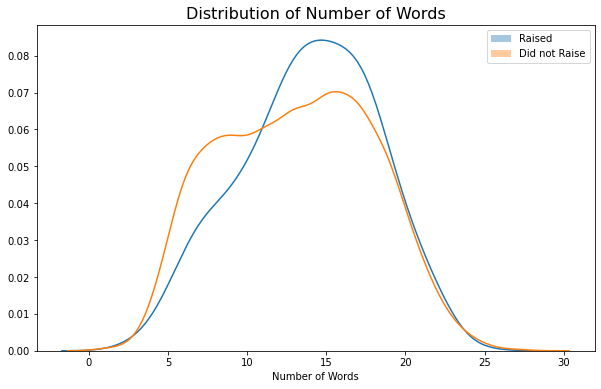

In [7]:
LogMin, LogMax = np.log10(X['Raised Series A'].min()),np.log10(X['Raised Series A'].max())
newBins = np.logspace(LogMin, LogMax,8)


fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(document_lengths[X['Raised Series A'] == 1], ax=ax,bins=newBins,label='Raised')
sns.distplot(document_lengths[X['Raised Series A'] == 0], ax=ax,bins=newBins, label='Did not Raise')

ax.set_title("Distribution of Number of Words", fontsize=16)
ax.set_xlabel("Number of Words")
plt.legend()
plt.show()

In [8]:
from nltk.stem import WordNetLemmatizer

def lemmatize(text):
    text = text.split()    
    lemmatizer = WordNetLemmatizer()
    lem_words = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(lem_words)
    return text

# Remove extra white space
X['Organization Description'] = X['Organization Description'].apply(lambda x: ' '.join(x.split()))

# Remove punctuation and numbers
X['Organization Description'] = X['Organization Description'].str.replace('[^\w\s]', ' ').str.replace('\d+', '')

# Convert to lower case
X['Organization Description'] = X['Organization Description'].str.lower()

# Lemmatize
X['Organization Description'] = X['Organization Description'].map(lambda x: lemmatize(x))


In [9]:
#build a document term matrix for use in building our LDA topic model 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['is','and','to','the','for','that','of','in','an','with','is an','on','by','their','your'])
tf_vectorizer = CountVectorizer(ngram_range = (1,2),
                                stop_words = stop_words,
                                max_df = 0.8, 
                                min_df = 2)

dtm_tf = tf_vectorizer.fit_transform(X['Organization Description'])
dtm_feature_names = tf_vectorizer.get_feature_names()

print('Document Term Matrix Shape: {}'.format(dtm_tf.shape))

Document Term Matrix Shape: (12623, 14579)


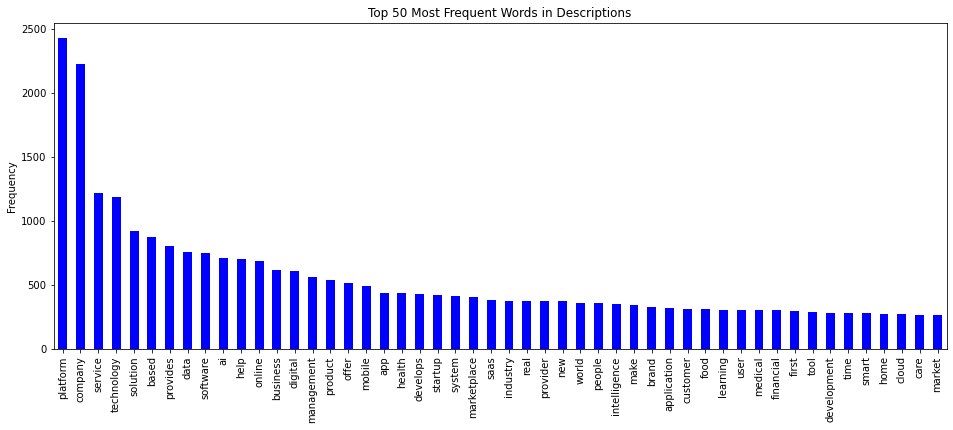

In [10]:
plt.figure(figsize=(16,6))
term_df = pd.DataFrame(dtm_tf.toarray(), columns=dtm_feature_names)
term_df.sum(axis=0).sort_values(ascending=False)[0:50].plot.bar(color='blue')
plt.title("Top 50 Most Frequent Words in Descriptions")
plt.ylabel("Frequency")
plt.show()

In [11]:
#build the topic model 
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10
lda_tf = LatentDirichletAllocation(n_components=n_topics, random_state=10)
lda_tf.fit(dtm_tf)#build the topic model 
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10
lda_tf = LatentDirichletAllocation(n_components=n_topics, random_state=10)
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(random_state=10)

In [12]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# Visualize the topics
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.025396 -0.140982       1        1  13.887478
7     -0.121966 -0.143456       2        1  11.164963
4     -0.074830  0.031323       3        1  11.130023
9     -0.051898  0.005779       4        1  10.042253
0      0.174643  0.022644       5        1   9.782093
1      0.148898  0.043079       6        1   9.658377
5      0.024095 -0.013572       7        1   9.267483
3     -0.027982 -0.020652       8        1   9.176674
2     -0.162291  0.158281       9        1   8.576756
8      0.065935  0.057557      10        1   7.313899, topic_info=             Term         Freq        Total Category  logprob  loglift
2500      company  2018.000000  2018.000000  Default  30.0000  30.0000
8421       mobile   442.000000   442.000000  Default  29.0000  29.0000
7463     learning   280.000000   280.000000  Default  28.0000  28.0000
6043       health   397.000000   397.000000  Default  27.0000  27.0000
286            ai   647.000000   647.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
7906   management    35.810288   510.639105  Topic10  -5.6693  -0.0420
3859       device    30.449936   214.652418  Topic10  -5.8315   0.6625
12327    solution    34.267690   836.654883  Topic10  -5.7133  -0.5798
1033        based    32.405334   797.974533  Topic10  -5.7692  -0.5884
6160         help    30.424977   642.631322  Topic10  -5.8323  -0.4349

[715 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
27         1  0.138748         access
27         3  0.073025         access
27         4  0.058420         access
27         5  0.051118         access
27         6  0.080328         access
...      ...       ...            ...
14504      6  0.163687          world
14504      7  0.033344          world
14504      8  0.118219          world
14504     10  0.015156          world
14520      5  0.928220  world largest

[1857 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 8, 5, 10, 1, 2, 6, 4, 3, 9])

In [13]:
# Extract Topic Distributions from LDA model for each pitcher
col_names = ["Topic {0}".format(x) for x in range(0, n_topics)]
topic_dist = lda_tf.transform(dtm_tf)
topic_df = pd.DataFrame(topic_dist, columns = col_names)
topic_df.reset_index(drop=True, inplace=True)
X.reset_index(drop=True, inplace=True)
# Join topic dataframe with numerical features from Method #1
data = pd.concat([X, topic_df], axis=1)
print(f'Original Dataframe Shape: {X.shape}')
print(f'New Dataframe Shape: {data.shape}\n')
data.head()

Original Dataframe Shape: (12623, 24)
New Dataframe Shape: (12623, 34)



,Organization Name,Money Raised Currency (in USD),Organization Description,Organization Location,Raised Series A,Primary Industry,Sub_Ind,Sub_Ind2,Sub_Ind3,Sub_Ind4,...,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,Xperiti,1200000.0,xperiti is an ai powered enterprise software d...,"New York, New York, United States, North America",0,Artificial Intelligence,Consulting,Content,Information Services,Information Technology,...,0.005556,0.005556,0.005557,0.005557,0.005556,0.005558,0.486122,0.005557,0.005556,0.469424
1,New Age Meats,2740000.0,new age meat focus on rapid development of hea...,"Berkeley, California, United States, North Ame...",0,Biotechnology,Food and Beverage,Not Listed,Not Listed,Not Listed,...,0.006251,0.006251,0.006252,0.006252,0.006252,0.006251,0.006251,0.006252,0.663315,0.286673
2,Clever Care Health Plan,6000000.0,clever care health plan is a healthcare compan...,"Westminster, California, United States, North ...",1,Health Care,Health Insurance,Insurance,Not Listed,Not Listed,...,0.005264,0.005264,0.005264,0.005264,0.952624,0.005264,0.005263,0.005264,0.005265,0.005265
3,Mahmee,3000000.0,mahmee provides comprehensive personalized sup...,"Los Angeles, California, United States, North ...",0,Health Care,mHealth,Women's,Not Listed,Not Listed,...,0.009091,0.009091,0.009093,0.918169,0.009096,0.009091,0.009092,0.009092,0.009092,0.009092
4,The Org,2500000.0,the org is a community to explore organization...,"New York, New York, United States, North America",1,Communities,Information Technology,Internet,Not Listed,Not Listed,...,0.219624,0.009092,0.009093,0.707633,0.009093,0.009093,0.009093,0.009093,0.009092,0.009093


In [14]:
#make train test split 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation

# Split dataframe into features and labels
features = data.loc[:, data.columns != 'Raised Series A']
labels = data['Raised Series A']

# Split data using 80% to train model and 20% to validate performance
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Confirm Shape of Train/Test data
print('Shape of Train Features: {}'.format(X_train.shape))
print('Shape of Train Labels:   {}'.format(y_train.shape))
print('Shape of Test Features:  {}'.format(X_test.shape))
print('Shape of Test Labels:    {}'.format(y_test.shape))

Shape of Train Features: (10098, 33)
Shape of Train Labels:   (10098,)
Shape of Test Features:  (2525, 33)
Shape of Test Labels:    (2525,)


In [15]:
y_train.value_counts(normalize=True)

0    0.943256
1    0.056744
Name: Raised Series A, dtype: float64

In [16]:
y_test.value_counts(normalize=True)

0    0.939406
1    0.060594
Name: Raised Series A, dtype: float64

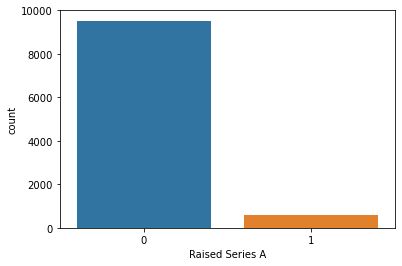

In [17]:
#data visualization for y_train
import seaborn as sns
sns.countplot(data = y_train , x= y_train)

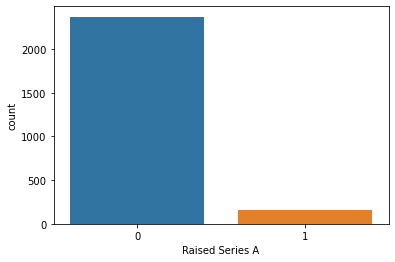

In [18]:
#data visualization for y_#data visualization for y_test
import seaborn as sns
sns.countplot(data = y_test , x= y_test)

In [19]:
X_train.sample(5)

,Organization Name,Money Raised Currency (in USD),Organization Description,Organization Location,Primary Industry,Sub_Ind,Sub_Ind2,Sub_Ind3,Sub_Ind4,Sub_Ind5,...,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
5481,Zencargo,4000000.0,zencargo provides ocean road air and rail frei...,"London, England, United Kingdom, Europe",Delivery,Freight Service,Logistics,Shipping,Supply Chain Management,Not Listed,...,0.011113,0.011115,0.011114,0.011115,0.899975,0.011116,0.011114,0.011112,0.011113,0.011113
11062,TraceItUp,550922.0,traceitup develops delivery management softwar...,"Istanbul, Istanbul, Turkey, Europe",Business Intelligence,Logistics,Restaurants,Not Listed,Not Listed,Not Listed,...,0.600410,0.007144,0.007143,0.342439,0.007144,0.007143,0.007144,0.007144,0.007143,0.007144
187,Padoq,1519712.0,padoq is the intelligent mobile platform that ...,"Manchester, Manchester, United Kingdom, Europe",Advertising Platforms,Communities,Payments,Social Media,Not Listed,Not Listed,...,0.004764,0.286853,0.004763,0.004764,0.237163,0.004763,0.004762,0.004763,0.442643,0.004763
6789,Female Founders Alliance,200000.0,female founder alliance is a private community...,"Seattle, Washington, United States, North America",Business Development,Communities,Social,Women's,Not Listed,Not Listed,...,0.007145,0.007144,0.007144,0.007144,0.007143,0.007145,0.007144,0.935702,0.007144,0.007144
2096,Fodel,2600000.0,fodel offer a network of pick up location a an...,"Dubai, Dubai, United Arab Emirates, Asia",Computer,E-Commerce,Not Listed,Not Listed,Not Listed,Not Listed,...,0.007147,0.443413,0.007144,0.499433,0.007143,0.007144,0.007144,0.007143,0.007143,0.007144


In [24]:
pd.set_option('display.max_colwidth', -1)

In [25]:
X_train.describe(exclude='number')

,Organization Name,Organization Description,Organization Location,Primary Industry,Sub_Ind,Sub_Ind2,Sub_Ind3,Sub_Ind4,Sub_Ind5,Sub_Ind6,...,Investor2,Investor3,Investor4,Investor5,Investor6,Investor7,Investor8,Investor9,Investor10,Investor11
count,10098,10098,10098,10098,10098,10098,10098,10098,10098,10098,...,10098,10098,10098,10098,10098,10098,10098,10098,10098,10098
unique,10098,10096,1973,449,539,531,439,353,271,210,...,1690,1173,803,550,367,250,161,116,87,67
top,á la couch,daoura is a company that aim to make public service around the world better and more efficient through artificial intelligence,"San Francisco, California, United States, North America",Artificial Intelligence,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
freq,1,2,579,820,1371,3313,6057,7719,8728,9363,...,7864,8648,9143,9466,9680,9822,9921,9973,10003,10031


In [26]:
X_train.describe()

,Money Raised Currency (in USD),Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
count,1.009800e+04,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000
mean,1.605754e+06,0.099176,0.099762,0.091085,0.090961,0.112025,0.093702,0.131002,0.106766,0.074844,0.100676
std,4.113281e+06,0.219718,0.219685,0.209925,0.215355,0.241987,0.217181,0.257133,0.229676,0.192213,0.232254
min,2.770000e+02,0.003449,0.003449,0.003449,0.003449,0.003449,0.003449,0.003449,0.003449,0.003449,0.003449
25%,2.250000e+05,0.007143,0.006670,0.006668,0.006669,0.007143,0.006669,0.007144,0.007143,0.006668,0.006669
50%,7.767135e+05,0.010000,0.010000,0.009093,0.009093,0.010000,0.009093,0.010002,0.010001,0.009092,0.009094
75%,2.000000e+06,0.016668,0.016669,0.016667,0.016667,0.016670,0.016667,0.020005,0.016670,0.014288,0.016667
max,2.944858e+08,0.966662,0.962492,0.960854,0.959083,0.965377,0.959084,0.965376,0.962495,0.968961,0.963991
